In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from matplotlib.colors import ListedColormap

from sklearn import metrics
from sklearn import model_selection
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import load_breast_cancer


# metrics.confusion_matrix()

# Diabetes Data

## Setup

In [2]:
dataset = pd.read_csv('diabetes.csv')
print(dataset.shape)
dataset.head(10)

(768, 9)


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


In [3]:
x_df = dataset.copy()
x_df.pop('Outcome')
x_df.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33
5,5,116,74,0,0,25.6,0.201,30
6,3,78,50,32,88,31.0,0.248,26
7,10,115,0,0,0,35.3,0.134,29
8,2,197,70,45,543,30.5,0.158,53
9,8,125,96,0,0,0.0,0.232,54


In [4]:
y_df = dataset.loc[:,'Outcome']
y_df.head(10)

0    1
1    0
2    1
3    0
4    1
5    0
6    1
7    0
8    1
9    1
Name: Outcome, dtype: int64

In [5]:
x_true = x_df.values
y_true = y_df.values

In [6]:
x_true.shape

(768, 8)

In [7]:
y_true.shape

(768,)

## Problem 1

### Part 1

In [8]:
x = x_true.copy()
y = y_true.copy()

x_train, x_test, y_train, y_test = model_selection.train_test_split(x, y, test_size = 0.2, random_state=1)

In [9]:
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [10]:
x_train.shape

(614, 8)

In [11]:
x_test.shape

(154, 8)

In [12]:
REGULARIZATION_VALUE = 10
classifier_model = LogisticRegression(random_state=0, C=REGULARIZATION_VALUE)
classifier_model.fit(x_train, y_train)

LogisticRegression(C=10, random_state=0)

In [13]:
y_pred = classifier_model.predict(x_test)
y_pred.shape

(154,)

In [14]:
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[89, 10],
       [24, 31]])

In [15]:
print(f"Accuracy: {100 * metrics.accuracy_score(y_test, y_pred)}%");
print(f"Precision: {100 * metrics.precision_score(y_test, y_pred)}%");
print(f"Recall: {100 * metrics.recall_score(y_test, y_pred)}%");

Accuracy: 77.92207792207793%
Precision: 75.60975609756098%
Recall: 56.36363636363636%


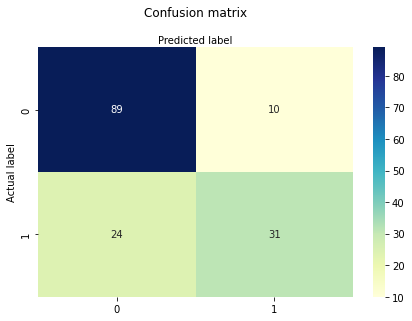

In [16]:
class_names=[0,1] # name of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1);
plt.ylabel('Actual label');
plt.xlabel('Predicted label');

In [17]:
del x_test, x_train, y_test, y_train, x, y, y_pred, classifier_model, cnf_matrix

## Problem 2

### Part 1

In [36]:
NUMBER_SPLITS=5

In [37]:
x = x_true.copy()
y = y_true.copy()

In [38]:
# Scale data        was testing data in 
# scaler = StandardScaler()
# x = scaler.fit_transform(x)

In [39]:
kfold = model_selection.KFold(n_splits=NUMBER_SPLITS, random_state=5, shuffle = True)
classifier_model = LogisticRegression(solver='liblinear')
results = model_selection.cross_val_score(classifier_model, x, y, cv = kfold)

print("Accuracy: %.3f%% (%.3f%%)" % (results.mean()*100, results.std()*100.0))

Accuracy: 76.435% (1.867%)


In [22]:
x_train, x_test, y_train, y_test = model_selection.train_test_split(x, y, test_size = 0.2, random_state=1)

In [23]:
# scaler = StandardScaler()
# x_train = scaler.fit_transform(x_train)
# x_test = scaler.transform(x_test)

In [24]:
x_train.shape

(614, 8)

In [25]:
x_test.shape

(154, 8)

In [26]:
classifier_model.fit(x_train, y_train)
predict = classifier_model.predict(x_test)

In [27]:
cnf_matrix = metrics.confusion_matrix(y_test, predict)
cnf_matrix

array([[90,  9],
       [25, 30]])

In [28]:
print(f"Accuracy: {100 * metrics.accuracy_score(y_test, predict)}%");
print(f"Precision: {100 * metrics.precision_score(y_test, predict)}%");
print(f"Recall: {100 * metrics.recall_score(y_test, predict)}%");

Accuracy: 77.92207792207793%
Precision: 76.92307692307693%
Recall: 54.54545454545454%


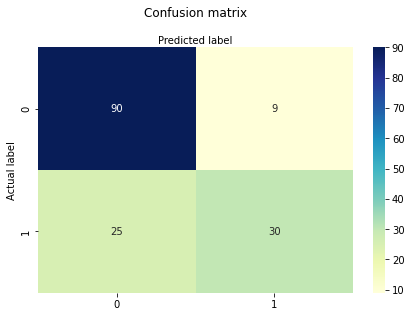

In [29]:
class_names=[0,1] # name of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1);
plt.ylabel('Actual label');
plt.xlabel('Predicted label');

### Part 2

# Cancer Data

## Setup

In [30]:
breast = load_breast_cancer()

In [31]:
breast_data = breast.data
breast_data.shape

(569, 30)

In [32]:
breast_labels = breast.target
breast_labels = np.reshape(breast_labels,(len(breast_labels),1))
breast_labels.shape

(569, 1)

In [33]:
final_breast_data = np.concatenate([breast_data,breast_labels],axis=1)
final_breast_data.shape

(569, 31)

In [34]:
breast_df = pd.DataFrame(final_breast_data)
breast_df.columns = np.append(breast.feature_names,'label')
breast_df.head(20) # print 20 to see two labels

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,label
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.26540,0.4601,0.11890,0.0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.18600,0.2750,0.08902,0.0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.24300,0.3613,0.08758,0.0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.25750,0.6638,0.17300,0.0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.16250,0.2364,0.07678,0.0
5,12.45,15.70,82.57,477.1,0.12780,0.17000,0.15780,0.08089,0.2087,0.07613,...,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.17410,0.3985,0.12440,0.0
6,18.25,19.98,119.60,1040.0,0.09463,0.10900,0.11270,0.07400,0.1794,0.05742,...,27.66,153.20,1606.0,0.1442,0.2576,0.3784,0.19320,0.3063,0.08368,0.0
7,13.71,20.83,90.20,577.9,0.11890,0.16450,0.09366,0.05985,0.2196,0.07451,...,28.14,110.60,897.0,0.1654,0.3682,0.2678,0.15560,0.3196,0.11510,0.0
8,13.00,21.82,87.50,519.8,0.12730,0.19320,0.18590,0.09353,0.2350,0.07389,...,30.73,106.20,739.3,0.1703,0.5401,0.5390,0.20600,0.4378,0.10720,0.0
9,12.46,24.04,83.97,475.9,0.11860,0.23960,0.22730,0.08543,0.2030,0.08243,...,40.68,97.65,711.4,0.1853,1.0580,1.1050,0.22100,0.4366,0.20750,0.0


In [35]:
# # Removed  for numeric data
# breast_df['label'].replace(0, 'Benign',inplace=True)
# breast_df['label'].replace(1, 'Malignant',inplace=True)
# breast_df.tail(6) # Showing tail 6 to test remap

## Problem 3

### Part 1

### Part 2

## Problem 4

### Part 1

### Part 2